# Neural Network in Go
## Introduction
In this module, we will learn about

* Neural Network Basics
* Forward Propagation
* Function Optimization
* Backward Propagation
* Loading CSV files using Go
* Golang matrix library `Gonum`

Before we start writing a feed forward fully connected neural network in Go, we must go over the basics and mathematical formulation in order to understand what the hell is going on.

## Basics
What is a neural network? I believe you have seen a picture like this before.

![neural_net](neural_net.png)

A neural network takes some inputs and spits out an output. Essentially, a neural network is a mathematical function that takes an input and creates an output, given a set of parameters (we called them weights.)

$$
f_{W}(\vec{x}) = \vec{y}
$$

For example, if we have a linear function:

$$
f_{W}(x) = W_{1}x + W_{0}
$$

This is equivalent to the equation of a line we learn in high school

$$
y = mx + b
$$ 

#### If it's just a line, then what's the fuss?!
It's actually more than a line, once you include nonlinearity activation. However, before we get to that part. Let's talk about what if `x` is a vector of inputs, i.e. `x` is a high dimensional input. How do you construct a line in higher dimensional space?

### Affine Transformation
When `x` is a vector of inputs:

$$
\vec{x} = x_{0}, x_{1}, x_{2}, x_{3}, ..., x_{N}
$$

We wish to apply a linear mapping to it, i.e. saying we want to take the inputs and use them as linear combinations to produce a set of outputs. In this case, we need to use matrices.

$$
\begin{vmatrix}
x_{0} & x_{1} & x_{2}
\end{vmatrix}
\times
\begin{vmatrix}
w_{0,0} & w_{0, 1} & w_{0, 2} \\
w_{1,0} & w_{1, 1} & w_{1, 2} \\
w_{2,0} & w_{2, 1} & w_{2, 2}
\end{vmatrix}
$$

We denote the weight matrix with a single letter $W$ and the input vector with a single letter $X$, and above equation is said to be applying a $W$ transformation on $X$. This is called *affine transformation*.

Let's look at an example in Python below:

In [1]:
import numpy as np

# We have an input, 1, 2, 3
x = np.array([1, 2, 3])

# We have a weight matrix
W = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

# We perform matrix multiplication and get an output 
y = np.dot(x, W)

print y 

[6 6 6]


### Non-linear Activation
We need to make our high dimensional line flexible, the ability to curve and create non-linear mapping. The choice of activation we will use for this exercise is *sigmoid activation*

$$
\sigma(\vec{x}) = \frac{1}{1 + e^{-\vec{x}}}
$$

There are many other activation functions you can choose from, e.g. `tanh`, `ReLU`, `leaky ReLU`, `exponential` and the list goes on. For now, let's just focus on one.

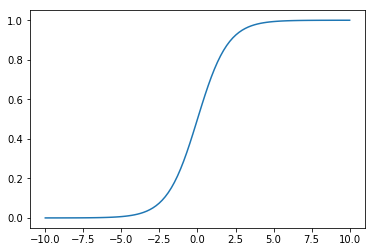

In [2]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt


def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-1 * x))


x = np.linspace(-10, 10, num=100)
plt.plot(x, sigmoid(x))
plt.show()

## How do they fit together?
Now you are probably like, "okay, so we began with a line, then x was originally a single value, then it became multi-dimensional input, then we talked about some matrix multiplications and sigmoid function. At this moment, you are most likely feeling:

![sowhat](sowhat.gif)


Let's head over to [TensorFlow Playground](http://playground.tensorflow.org)

## Forward Propagation

Let's imagine that we have a neural network with NO hidden layer. Let's say our input is an array of four elements, they represent `height`, `weight`, `fur_length`, and `fat ratio` of a dog. The output of the neural network would be a dog breed classification based on your input. For sake of simplicity, let's assume that there are only 3 breeds in the provided data.

Input:
$$
\vec{x} = [x_{0}, x_{1}, x_{2}, x_{3}]
$$

Weights:
$$
\begin{vmatrix}
w_{0,0} & w_{0, 1} & w_{0, 2} \\
w_{1,0} & w_{1, 1} & w_{1, 2} \\
w_{2,0} & w_{2, 1} & w_{2, 2} \\ 
w_{3,0} & w_{3, 1} & w_{3, 2}
\end{vmatrix}
$$

The input is of shape `(1, 4)` and the weight matrix is of shape `(4, 3)`. The matrix product of them is of shape `(1, 3)`, which represent the score for each classification. 

$$
y_{score} = [y_{0}, y_{1}, y_{2}]
$$

In [3]:
# Let's say you have multiple dog inputs, cause you want to do a batch of classification
dog_input_1 = [20, 10, 4, 0.90] # Completely bullshit data
dog_input_2 = [21, 5, 3, 0.50]

inputs = np.array([dog_input_1, dog_input_2])

print inputs.shape

W = np.random.randn(4, 3)

print W.shape

output = np.dot(inputs, W)
act = sigmoid(output)

print act

(2, 4)
(4, 3)
[[9.99957204e-01 5.41739377e-04 6.59258125e-05]
 [9.98841096e-01 4.47344353e-08 2.64226686e-06]]


Let's get fancy and do multiple hidden layers; let's try two!

Input:
$$
\vec{x} = [x_{0}, x_{1}, x_{2}, x_{3}]
$$

First weight matrix is of shape `(4, 4)` 
$$
\begin{vmatrix}
w_{0,0} & w_{0, 1} & w_{0, 2} & w_{0, 3} \\
w_{1,0} & w_{1, 1} & w_{1, 2} & w_{1, 3} \\
w_{2,0} & w_{2, 1} & w_{2, 2} & w_{2, 3} \\ 
w_{3,0} & w_{3, 1} & w_{3, 2} & w_{3, 3}
\end{vmatrix}
$$

Second weight matrix is of shape `(4, 3)`
$$
\begin{vmatrix}
w_{0,0} & w_{0, 1} & w_{0, 2} \\
w_{1,0} & w_{1, 1} & w_{1, 2} \\
w_{2,0} & w_{2, 1} & w_{2, 2} \\ 
w_{3,0} & w_{3, 1} & w_{3, 2}
\end{vmatrix}
$$

Third weight matrix is of shape `(3, 3)`
$$
\begin{vmatrix}
w_{0,0} & w_{0, 1} & w_{0, 2} \\
w_{1,0} & w_{1, 1} & w_{1, 2} \\
w_{2,0} & w_{2, 1} & w_{2, 2}
\end{vmatrix}
$$





In [4]:
W1 = np.random.randn(4, 4)
W2 = np.random.randn(4, 3)
W3 = np.random.randn(3, 3)

layer_1_output = np.dot(inputs, W1)
layer_1_act = sigmoid(layer_1_output)

print "Layer 1 output has shape %s" % str(layer_1_act.shape)

layer_2_output = np.dot(layer_1_act, W2)
layer_2_act = sigmoid(layer_2_output)

print "Layer 2 output has shape %s" % str(layer_2_act.shape)

layer_3_output = np.dot(layer_2_act, W3)
layer_3_act = sigmoid(layer_3_output)

print "Layer 3 output has shape %s" % str(layer_3_act.shape)

print "Final output:"
print layer_3_act

Layer 1 output has shape (2, 4)
Layer 2 output has shape (2, 3)
Layer 3 output has shape (2, 3)
Final output:
[[0.45343114 0.39289059 0.22659102]
 [0.45398437 0.39270209 0.22705128]]


## Function Optimization
Now you know how to use a neural network to produce output but the output is crap; it does not produce meaningful and intelligent result. The next question is how to make your neural network *smart*, in other words, how to train it with data.

We need to know about what is function optimization.

### Linear Regression
If you are given a set of data points with x and y coordinates, how do you fit a line that best represents the pattern you are seeing your data?

$$
\vec{x} = [x_{0}, x_{1}, x_{2}, ..., x_{N}]
$$

$$
\vec{y} = [y_{0}, y_{1}, y_{2}, ..., y_{N}]
$$

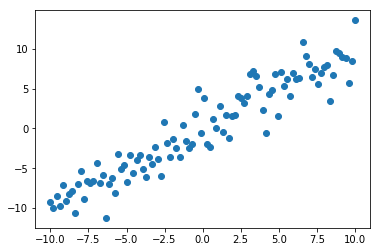

In [5]:
x = np.linspace(-10, 10, num=100)
y = np.linspace(-10, 10, num=100) + np.random.randn(100,) * 2

plt.plot(x, y, 'o')
plt.show()

In the example above, we can clearly see a trend in the data. Let's assume a linear model that will fit a line to this dataset.

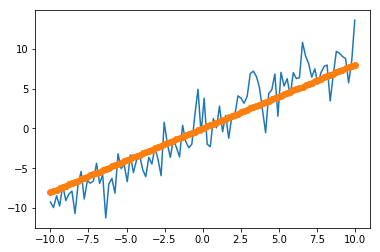

In [6]:
def linear_model(m, b, x):
    return m * x + b

w0 = 0
w1 = 0.8

plt.plot(x, y, x, linear_model(w1, w0, x), 'o')
plt.show()

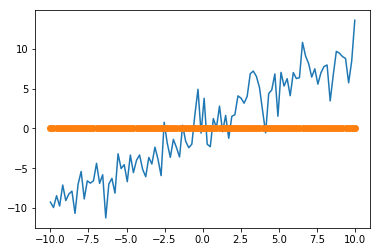

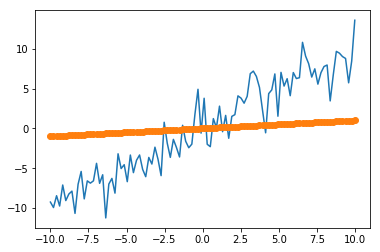

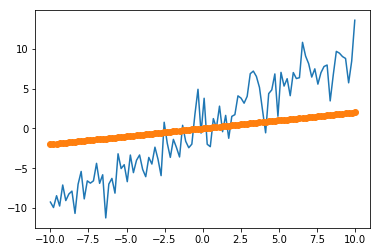

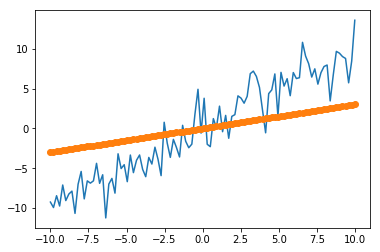

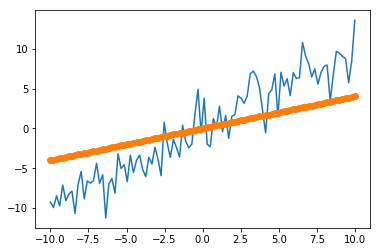

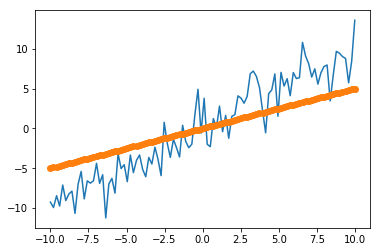

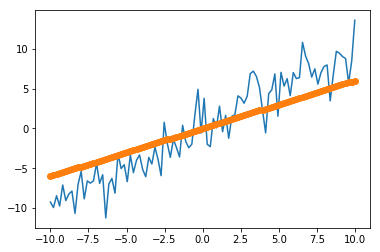

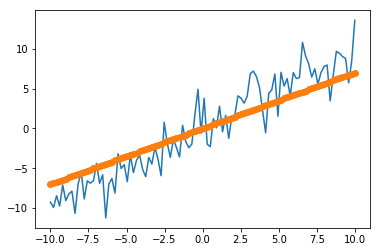

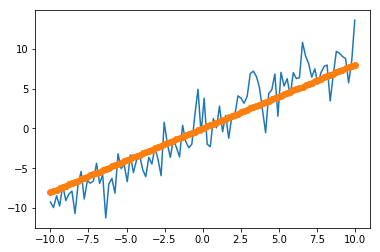

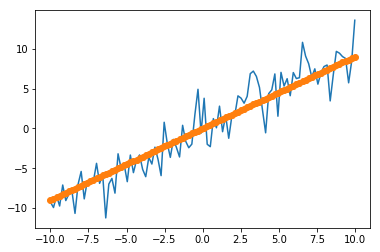

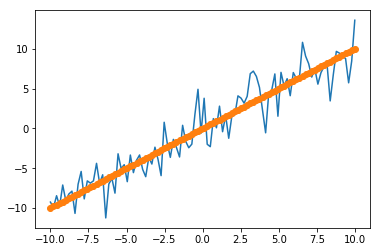

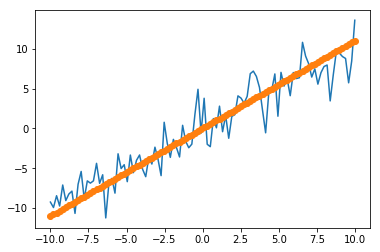

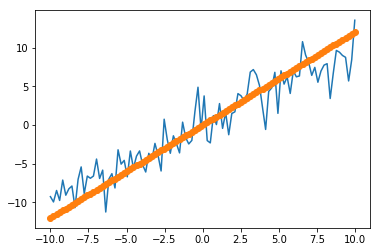

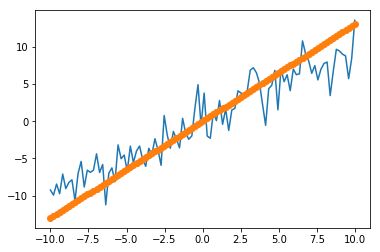

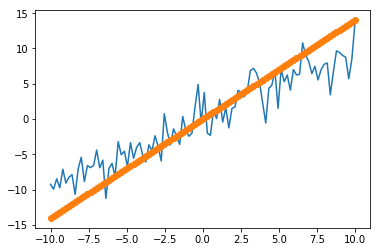

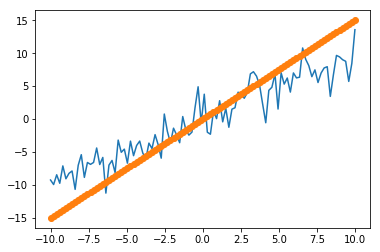

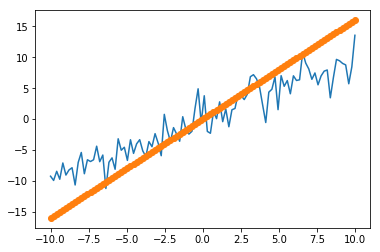

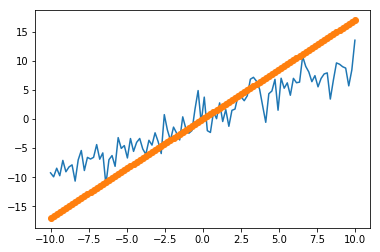

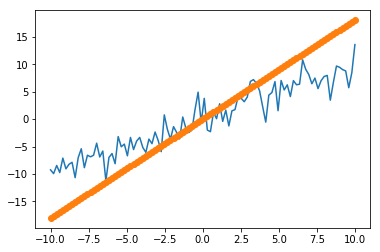

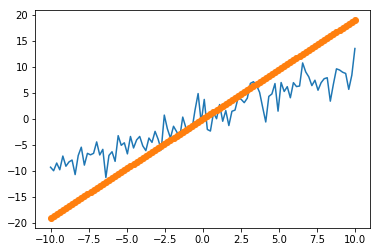

In [7]:
w1 = 0
while w1 < 2:
    plt.plot(x, y, x, linear_model(w1, w0, x), 'o')
    plt.show()
    w1 += 0.1

### Find the best fit
How to find the best fit without bunch of random guesses? Let's define what it means to have a best fit line first.

$$
Error = L = \frac{1}{2}\Sigma_{i = 0}^{i = N} (y_{i} - \hat{y}_{i})^{2}
$$

The *y hat* is the prediction from our linear model, while $y_{i}$ is the actual data point from our data set. The error is a measurement of how closely our model resembles reality. If our model is off by a lot, the error is a big number. If our model has perfect prediction, then we should expect an error of 0. This error formulation is known as the **L2 Loss Function**.

Now we know how to measure the fitness of a model. The next is to learn how to use this measurement to find the best fit.

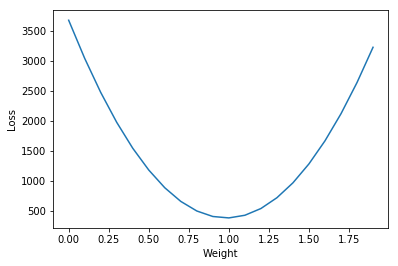

In [8]:
def loss(x, y, y_pred):
    diff = y - y_pred
    return (diff * diff).sum(axis=0)

losses = []
weights = []
w0, w1 = 0, 0
while w1 < 2:
    weights.append(w1)
    losses.append(loss(x, y, linear_model(w1, w0, x)))
    w1 += 0.1
    
plt.plot(weights, losses)
plt.ylabel("Loss")
plt.xlabel("Weight")
plt.show()

Loss function is parabolic and where do you think the minimum is? It looks like around $W = 1$ right? What would be a more systematic approach that will lead us to the answer?

## Derivatives
Imagine you start on a random point of this curve (graph above), how do know you whether you should increase or decrease $w_{1}$ to get to a lower loss value, i.e. reducing error in your model. You can look at the slope of whichever point you are at. Moving along the **opposite** direction of your slope will always lead to a lower point in the function.

Let's imagine your $w_{1}$ is 0. You look at your slope, it has a negative value. You move your $w_{1}$ along the positive direction, i.e. increasing your $w_{1}$ such that you are moving from left to right on the x-axis. Similarly if your $w_{1}$ starts at 1.75, you look at your slope and realize that it is a positive slope. You move your $w_{1}$ along the negative direction, i.e. decreasing your $w_{1}$ such that you are moving from right to left on the x-axis. 

Recall linear model is defined as follows:

$$
\hat{y} = w_{1}x + w_{0}
$$

The L2 loss function is defined as follows:

$$
L = (\hat{y} - y)^{2}
$$

The slope of the loss function with respect to $w_{1}$ is:

$$
\frac{\partial L}{\partial w_{1}} = (w_{1}x + w_{0} - y) \cdot x
$$

The slope of the loss function with respect to $w_{0}$ is:

$$
\frac{\partial L}{\partial w_{1}} = (w_{1}x + w_{0} - y)
$$


In higher dimensional examples, the slope is also known as a gradient.

In [9]:
w0, w1 = 0, 0.1
step_size = 1e-5
total_steps = 100

# Perform update on w1 only
for step in range(total_steps):
    grad_w1 = ((w1*x + w0 - y) * x).sum()
    w1 = w1 - (step_size * grad_w1)
    print loss(x, y, linear_model(w1, w0, x))
    
print "The value for w0 is %f" % w0
print "The value for w1 is %f" % w1

2860.9213470075674
2694.7870291890613
2539.759955127538
2395.097527715446
2260.1067976675213
2134.141144215832
2016.59717772363
1906.9118493811802
1804.55975413868
1709.0506139570261
1619.9269293209045
1536.761787764698
1459.1568189137952
1386.7402862457266
1319.1653064304435
1256.108187720182
1197.2668794296137
1142.3595250791168
1091.1231122705606
1043.3122128283617
998.6978071709407
957.066187281185
918.2179330210322
881.9669568865957
848.1396126281066
816.5738634648638
787.1185059108424
759.6324454930035
733.9840208929106
710.0503732742179
687.7168577750368
666.8764943461629
647.4294553046169
629.2825871478244
612.3489643378692
596.5474729183982
581.8024219696532
568.0431810404596
555.2038418204274
543.2229024317371
532.0429728282327
521.6104998906516
511.87551090116347
502.7913741684374
494.3145756565983
486.4045105481049
479.02328874211116
472.13555335662386
465.70831136506456
459.7107755559654
454.1142170587644
448.8918277292877
444.01859173572643
439.47116572999045
435.22776703

In [10]:
w0, w1 = 0, 0.1
step_size = 1e-5
total_steps = 200

# Perform update on w1 AND w0
for step in range(total_steps):
    grad_w0 = (w1*x + w0 - y).sum()
    grad_w1 = ((w1*x + w0 - y) * x).sum()
    w0 = w0 - (step_size * grad_w0)
    w1 = w1 - (step_size * grad_w1)
    print loss(x, y, linear_model(w1, w0, x))
    
print "The value for w0 is %f" % w0
print "The value for w1 is %f" % w1

2860.9210866251715
2694.786508944775
2539.7591755408257
2395.096489304732
2260.1055009501956
2134.1395897082493
2016.5953659411134
1906.9097808380218
1804.5574293481445
1709.048033431352
1619.924093571306
1536.7586973013679
1459.1534742459069
1386.7366878814346
1319.1614548768869
1256.1040834834862
1197.2625230148917
1142.354916990473
1091.1182530110907
1043.307102900157
998.6924470750872
957.0605775177683
918.2120740891378
881.9608492843109
848.1332568525239
816.5672600120816
787.1116552759672
759.6253481701526
733.9766773752128
710.0427840538173
687.7090233430928
666.8684151928534
647.4211319191401
629.2740200184
612.3401539517416
596.5384197618374
581.7931265279577
568.0336437979571
555.1940632604776
543.2128830367338
532.0327130796051
521.6000002688663
511.8647718857274
502.78039623789823
494.3033592885473
486.3930562191788
479.0115969279936
472.12362453204764
465.69614600381396
459.69837413087686
454.10158004172956
448.8789555912551
444.0054849467029
439.4578247590431
435.21419234

Notice that the best fit parameters have come out to be 0 for $w_{0}$ and 1 for $w_{1}$, which makes perfect sense because when I generated the data. I basically did $y = x$ with some random noise on the y-data. The best fit model should be a straight line that starts from `(0, 0)` with a slope of 1. 

## Backward Propagation
What you did in the previous section is basically training a machine to *learn* a pattern. The pattern was quite simple, it's just a straight line. The objective was to learn the line and use the line to make future predictions. We can extend the technique to make it work on a more complicated model such that you learn more than just a line. I seriously don't know what you'd call something that exists as a 20+ dimensional object (that's definitely more than a line.) 

In this section, we will go back the neural network example and compute the gradient of loss function with respect to each weight parameter of a neural network.

Let's imagine that we have `N` dogs and each dog has four features, like what I mentioned above (*height*, *weight*, *fur_length*, and *fat ratio*.) We want to create a very simple neural network with one hidden layer. Let's denote `H` to be the hidden dimension, `I` is the input dimension and `O` is the output dimension. 

Thus, X is a matrix of shape `(N, I)`, because we have `N` dogs and each dog has `I` features. We are batching them up in one matrix.

In [11]:
# Forward Propagation
N, H, I, O = 10, 4, 4, 3

X = np.random.randn(N, I)
Y = np.random.randn(N, O)
W1 = np.random.randn(I, H)
W2 = np.random.randn(H, O)

a1 = sigmoid(np.dot(X, W1))  # Shape(N, H)
a2 = sigmoid(np.dot(a1, W2))  # Shape(N, O)
# a1= (N, H)
# a2 = (N, O) 
# W2 = (H, O)
loss = (0.5*(Y - a2)*(Y - a2)).sum()

print loss

21.117274476737677


### Chain Rule
The forward propagation of a neural network represents a very complex function. It is not a trivial task to find the derivative or slope of such complex function. However, we can rely on a simple mathematical property, known as the chain rule. 

$$
\frac{\partial f(g(x))}{\partial x} = \frac{\partial f}{\partial g}\frac{\partial g}{\partial x}
$$

Let's put it in a concrete example

$$
g(x) = x^{2}
$$

$$
f(g) = sin(g) = f(g(x)) = sin(x^{2})
$$

We compute the derivative for f and g respectively, step by step. We start from the *outer* layer of the function and progressively move in. At the end we multiply everything together to get the final answer. 

$$
\frac{\partial f}{\partial g} = cos(g)
$$

$$
\frac{\partial g}{\partial x} = 2x
$$

$$
\frac{\partial f}{\partial g}\frac{\partial g}{\partial x} = 2x \cdot cos(g) = 2x \cdot cos(x^{2}) = \frac{\partial f(g(x))}{\partial x} 
$$

### Chain Rule in Neural Networks
We can apply the same concept to find the derivatives of every parameter in a neural network regardless of its size. First, we must treat each layer as an individual function, like $f(g)$ and $g(x)$ above. We have introduced two types of mathematical operation, an affine transformation and a sigmoid activation.

Think of affine transformation as $g(X, W)$, a function that takes two matrices as arguments and produces a matrix product as its output. 

$$
\vec{g}(X, W) = X \cdot W
$$

Think of sigmoid activation as $f(\vec{g})$, a function that takes the output of affine transformation and performs value squashing to `[0, 1]` on each element of g.

$$
f(\vec{g}) = \frac{1}{1 + e^{-\vec{g}}}
$$

Think of loss function as $L(f)$, a function that takes neural activation and compute how much discrepancy/error it has from expectation.

$$
L(\vec{f}) = \frac{1}{2} \Sigma_{i} (\vec{f}_{i} - \vec{y}_{i})^{2}
$$

Let's take the derivatives for $g(X, W)$

$$
\frac{\partial \vec{g}}{\partial X} = W
$$

$$
\frac{\partial \vec{g}}{\partial W} = X
$$

Derivative for the sigmoid function has a very simple form. I am going to skip the mathematical derivation for this expression because that's too much to pack into this section.
$$
\frac{\partial f}{\partial g} = \vec{g} \cdot (1 - \vec{g})
$$

Derivative for the loss function is

$$
\frac{\partial L}{\partial f} = \vec{f} - \vec{y}
$$

Please note that $f$ and $g$ are vectors and L is a scalar value, thus the summation mark in the loss function.

### Apply it
Please refer to the Python example above for forward propagation. I am using the same example here. To make the steps of calculation more apparent and to minimize *wtf* moments, I will denote `np.dot(X, W1)` as `aff1` and `np.dot(a1, W2)` as `aff2`. 

Alright let's take the gradient of **loss** with respect to `a2` which is the second activation vector. 

$$
\frac{\partial L}{\partial a_{2}} = \vec{y} - \vec{a_{2}}
$$

#### In Python:
```python
grad_a2 = Y - a2
```

This is it, just like what we calculated above. Now let's try to take the gradient of `a2` with respect to `aff2`. 

$$
\frac{\partial a_{2}}{\partial aff_{2}} = \vec{a_{2}} \cdot (1 - \vec{a_{2}})
$$

However, what we ultimately want is gradient of loss with respect to `aff2`. So we use chain rule:

$$
\frac{\partial L}{\partial aff_{2}} = \frac{\partial L}{\partial a_{2}} \cdot \frac{\partial a_{2}}{\partial aff_{2}}
$$

#### In Python:
```python
grad_aff2 = grad_a2 * a2 * (1 - a2)
```

Now we take the gradient of `W_{2}` with respect to `aff2` which is actually quite easy. 

$$
\frac{\partial aff_{2}}{\partial W_{2}} = \vec{a_{1}}
$$

And we want gradient of loss with respect to $W_{2}$

$$
\frac{\partial L}{\partial W_{2}} = \frac{\partial L}{\partial aff_{2}} \cdot \frac{\partial aff_{2}}{\partial W_{2}}
$$

#### In Python:
```python
grad_W2 = np.dot(a1.T, grad_aff2)
```

Due to the nature of matrix multiplication, we cannot simply multiply the two matrix together in any random order. The dimension must work out. Recall that `a1` has a shape of `(N, H)` and `grad_aff2` has a shape of `(N, O)`. `grad_W2` has the same shape as `W2` which is `(H, O)`. In order to to make the multiplication of `a1` and `grad_aff2` to produce the dimension of `W2`. We need to perform a little transpose on `a1`. We do the same for `grad_a1`. 

#### In Python:
```python
grad_a1 = np.dot(grad_aff2, W2.T)
```

In [12]:
# Backward Propagation
grad_a2 = (Y - a2)  # Shape(N, O)

grad_aff2 = grad_a2 * a2 * (1 - a2)
grad_W2 = np.dot(a1.T, grad_aff2)   # Shape(H, O)
grad_a1 = np.dot(grad_aff2, W2.T)  # Shape(N, H) 

grad_aff1 = grad_a1 * (1 - a1) * a1
grad_W1 = np.dot(X.T, grad_aff1)  # Shape(I, H) 
grad_X = np.dot(grad_aff1, W1.T) # Shape(N, I)

print grad_W2.shape
print grad_W1.shape

(4, 3)
(4, 4)
